# RT626 HW2 RNN Design하여 감정 분류하기

## IMDB Dataset 얻어오기


In [2]:
#관련 라이브러리 삽입

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb

## 편의를 위해서 Keras에서 제공하는 IMDB Dataset을 이용한다.

In [3]:
# Data X는 리뷰 정보 Data Y는 스탠포드에서 정리한 감정 정보가 저장된다. 감정 정보의 Class는 2가지이며, 긍정 부정을 나타낸다.
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 2s 0us/step
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
e:\onedrive - dgist.ac.kr\1.dgist\1.수업\2021년 1학기\지능시스템설계\hw1\rt626\.rt626\hw2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
e:\onedrive - dgist.ac.kr\1.dgist\1.수업\2021년 1학기\지능시스템설계\hw1\rt626\.rt626\hw2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarni

## Dataset 차원의 크기를 확인하기.

In [6]:
print('Number of train dataset : '+ str(len(X_train)))
print('Number of test dataset : '+ str(len(X_test)))
num_classes = max(y_train) + 1
print('Type of classes : '+ str(num_classes))

Error: Debugging while attached to a remote server is not currently supported.

## Data 확인 출력하기

In [16]:
print(X_train[0])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 44076, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 51428, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]


위 출력 결과를 확인하면 보통의 문자열과 다르게 하나의 리뷰가 배열 형태로 출력되는데, 이는 데이터 처리가 쉽도록 이미 정수화 인코딩(Integer encoding)이 된 상태이기 때문이다. 정수화 인코딩(Integer encoding)에 대한 설명은 리포트에 정리할 것이다.
>IMDB Dataset에서 단어의 정수 인코딩은 전체 리뷰 Data에서 사람들이 사용한 단어를 정리해서 Data를 인코딩한다. 따라서 다양한 단어가 Dataset에 포함될 수 있었기 때문에 44076과 같은 높은 숫자가 나타날 수 있었다. 보통 단어를 정수 인코딩하면 정수가 작을 수록 사용빈도가 높은 단어이다.

## Data의 특성 파악하기

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


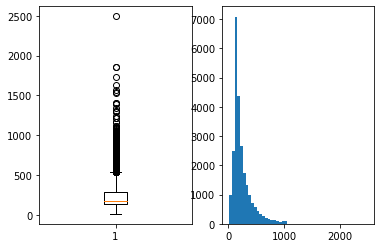

In [17]:
len_result = [len(s) for s in X_train]

print('Maximum length of reviews : {}'.format(np.max(len_result)))
print('Average length of reviews : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()